In [2]:
#loading ResNet34
import torchvision 
from torchvision import datasets, models, transforms
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

transforms = transforms.Compose([ 
    transforms.Resize(256), 
    transforms.CenterCrop(224), 
    transforms.ToTensor(), 
    transforms.Normalize([0.485, 0.456, 0.406], 
              [0.229, 0.224, 0.225]) ])
train_set = datasets.ImageFolder("/content/data/train",transforms) 
val_set = datasets.ImageFolder("/content/data/val",transforms)
model = models.resnet34(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [1]:
#put the data folder in google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#modify the parameter, the class reduce to 2
fc_features = model.fc.in_features
model.fc = nn.Linear(fc_features, 2)

In [0]:
#set the learning rate =0.01
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [0]:
#set the train epochs to 20
train_loss_history = []
test_loss_history = []
num_epochs = 20

In [0]:
trainDataLoader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(val_set, batch_size=16, shuffle=False)

In [17]:

for epoch in range(num_epochs):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    optimizer.zero_grad()
    predicted_output = model(images)
    fit = Loss(predicted_output, labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
    

  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      predicted_output = model(images)
      fit = Loss(predicted_output, labels)
      test_loss += fit.item()

  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  #print(labels)
  
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 0.6478094309568405, Test loss 1.1682060956954956
Epoch 1, Train loss 0.40678268671035767, Test loss 0.5462702810764313
Epoch 2, Train loss 0.4476618617773056, Test loss 0.41935715079307556
Epoch 3, Train loss 0.1415431760251522, Test loss 0.4384574145078659
Epoch 4, Train loss 0.15151311084628105, Test loss 0.5162574350833893
Epoch 5, Train loss 0.15208167023956776, Test loss 0.8864755742251873
Epoch 6, Train loss 0.12385286018252373, Test loss 0.5030719563364983
Epoch 7, Train loss 0.11403382569551468, Test loss 0.39722740650177
Epoch 8, Train loss 0.1276714475825429, Test loss 0.7478965483605862
Epoch 9, Train loss 0.06422860734164715, Test loss 0.5087996274232864
Epoch 10, Train loss 0.06320952903479338, Test loss 0.5794700905680656
Epoch 11, Train loss 0.056258318945765495, Test loss 0.5260570049285889
Epoch 12, Train loss 0.04380677081644535, Test loss 0.48836012184619904
Epoch 13, Train loss 0.03463636990636587, Test loss 0.4971581846475601
Epoch 14, Train los

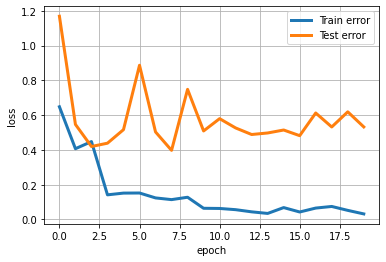

In [18]:
plt.plot(np.arange(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(np.arange(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [21]:
def evaluate(dataloader):
  total, correct = 0, 0
  model.eval()
  for data in dataloader:
    images, labels = data
   
    predicted_output = model(images)
    _, predicted_labels = torch.max(predicted_output, 1)
   
    total += labels.size(0)
    correct += (predicted_labels == labels).sum().item()
  return 100 * correct/total
print('Train acc = %0.2f, test acc = %0.2f' % (evaluate(trainDataLoader), evaluate(testDataLoader)))

Train acc = 100.00, test acc = 100.00
